# <center> Heart Attack Analysis & Prediction</center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Heart_diagram-en.svg/762px-Heart_diagram-en.svg.png" height="500" width="500">

# about Dataset
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
    - angina - A type of chest pain caused by reduced blood flow to the heart.
- ca: number of major vessels (0-3)
    -  aorta, the superior vena cava, the inferior vena cava, the pulmonary artery
- cp : Chest Pain type chest pain type
    - Value 1: typical angina 
        - 1) chest pain or discomfort in the center of the chest behind the breastbone
        - 2) gets worse with exertion or stress
        - 3) gets better with rest or a medication called nitroglycerin.
    - Value 2: atypical angina
        - atypical chest pain will be sharp, stabbing, or tearing, in a specific area of the chest, and may last for hours or days
    - Value 3: non-anginal pain
        - not caused by reduced blood flow to the heart
    - Value 4: asymptomatic
        - pain caused/ heart attack without showing any if the above symptoms
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# !pip install kaggle

In [39]:
# !kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [40]:
df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# about Dataset
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
    - angina - A type of chest pain caused by reduced blood flow to the heart.
- ca: number of major vessels (0-3)
    -  aorta, the superior vena cava, the inferior vena cava, the pulmonary artery
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [43]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [44]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
df2 = df

In [46]:
#df.rename(columns={'thalachh':'max_hrate','caa':'vessel','thall':''})

<AxesSubplot:>

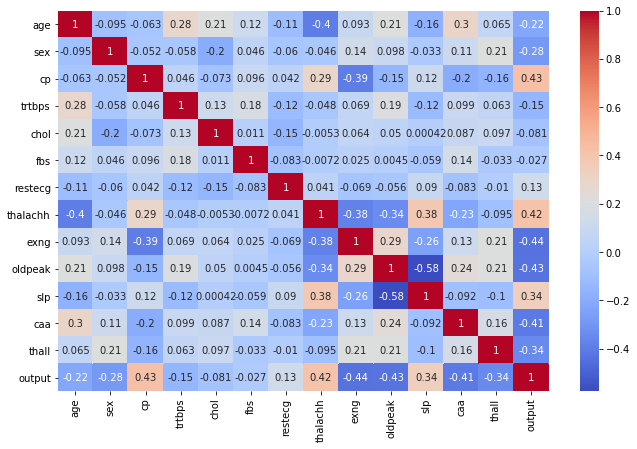

In [47]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='sex', ylabel='count'>

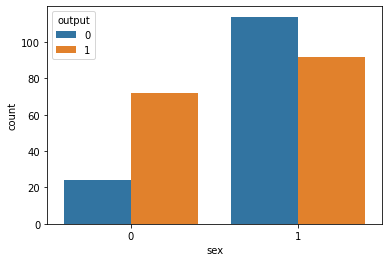

In [48]:
sns.countplot(data=df, x='sex', hue='output')

In [49]:
df.groupby('sex').output.value_counts()

sex  output
0    1          72
     0          24
1    0         114
     1          92
Name: output, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

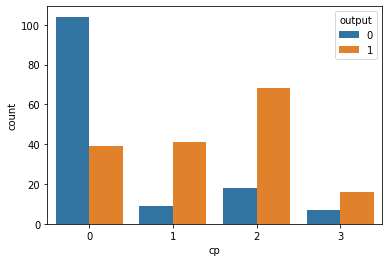

In [50]:
sns.countplot(data=df, x='cp', hue='output')

In [51]:
df.groupby('cp').output.value_counts()

cp  output
0   0         104
    1          39
1   1          41
    0           9
2   1          68
    0          18
3   1          16
    0           7
Name: output, dtype: int64

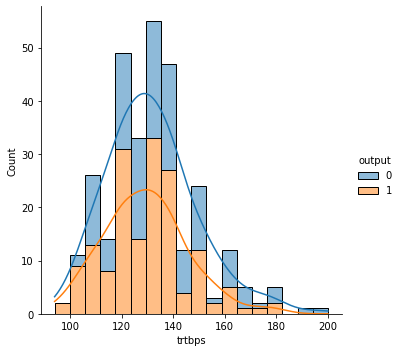

In [52]:
sns.displot(data=df, x='trtbps', hue='output', kde=True, multiple='stack')

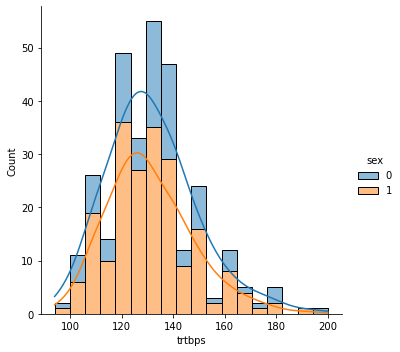

In [53]:
sns.displot(data=df, x='trtbps', hue='sex', kde=True, multiple='stack')

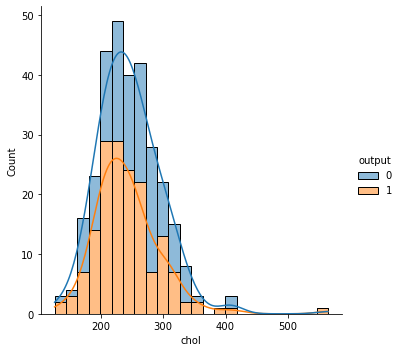

In [54]:
sns.displot(data=df, x='chol', hue='output', kde=True, multiple='stack')

<AxesSubplot:xlabel='fbs', ylabel='count'>

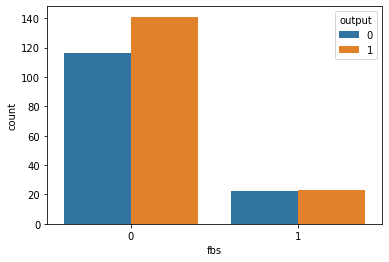

In [55]:
sns.countplot(data=df, x='fbs', hue='output')

<AxesSubplot:xlabel='caa', ylabel='count'>

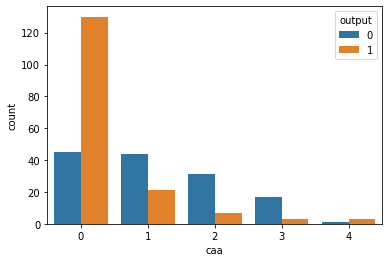

In [56]:
sns.countplot(data=df, x='caa', hue='output')

C:\Users\shabisht\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

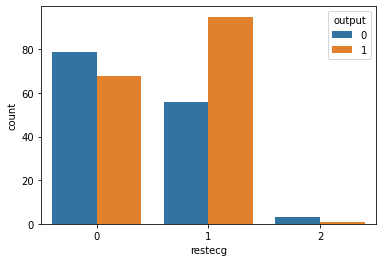

In [57]:
sns.countplot(df.restecg, hue=df.output)

<AxesSubplot:xlabel='exng', ylabel='count'>

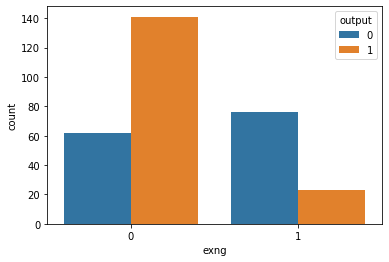

In [58]:
sns.countplot(data=df, x='exng', hue='output')

<AxesSubplot:xlabel='thall', ylabel='count'>

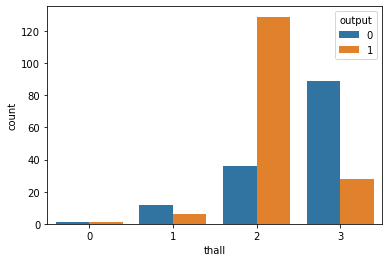

In [59]:
sns.countplot(data=df, x='thall', hue='output')

C:\Users\shabisht\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

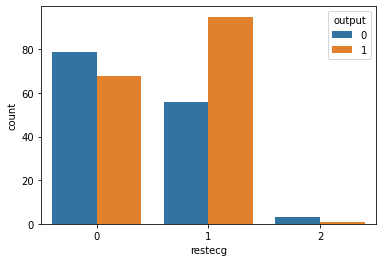

In [60]:
sns.countplot(df.restecg, hue=df.output)

In [61]:
# col_index = list(range(0,4))+[-1]
# sns.pairplot(df.iloc[:,col_index], hue='output', height=3, aspect=1)

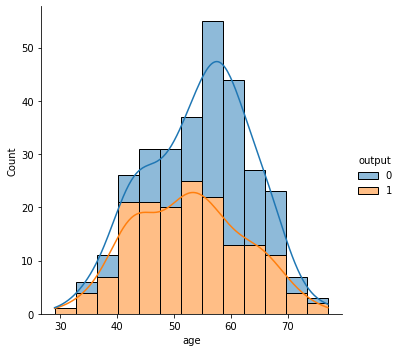

In [62]:
sns.displot(data=df, x='age',hue='output', multiple='stack', kde=True)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X = MinMaxScaler().fit_transform(df.drop(columns='output'))
X1 = StandardScaler().fit_transform(df.drop(columns='output'))

xtrn,xtest,ytrn,ytest = train_test_split(X, df.output, test_size=0.2)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
accuracy = list()
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k).fit(xtrn,ytrn)
    accuracy.append(accuracy_score(ytest,model.predict(xtest)))

<AxesSubplot:>

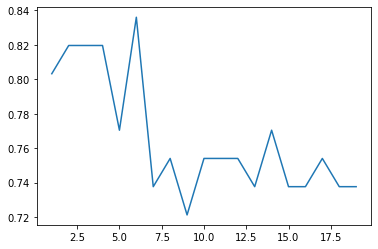

In [76]:
sns.lineplot(x=range(1,20), y=accuracy)

In [77]:
score=[]
for x in range(1,11):
    xtrn,xtest,ytrn,ytest = train_test_split(X, df.output, test_size=0.2)
    algos = [LogisticRegression(),KNeighborsClassifier(n_neighbors=3),SVC(kernel='poly', degree=4),
             DecisionTreeClassifier(), RandomForestClassifier()]

    accuracy=[]
    for algo in algos:
        model = algo.fit(xtrn,ytrn)
        accuracy.append(accuracy_score(ytest, model.predict(xtest)))
    score.append(accuracy)

algo_name = ['LR','KNN','SVM','DT','RF']
ans = pd.DataFrame(score,columns=algo_name)
ans

,LR,KNN,SVM,DT,RF
0,0.770492,0.754098,0.803279,0.770492,0.754098
1,0.868852,0.852459,0.852459,0.836066,0.868852
2,0.786885,0.754098,0.819672,0.754098,0.819672
3,0.868852,0.819672,0.786885,0.786885,0.868852
4,0.786885,0.786885,0.803279,0.786885,0.786885
5,0.868852,0.885246,0.901639,0.819672,0.852459
6,0.786885,0.737705,0.754098,0.655738,0.786885
7,0.852459,0.770492,0.803279,0.786885,0.852459
8,0.819672,0.786885,0.754098,0.704918,0.754098
9,0.852459,0.852459,0.721311,0.770492,0.819672


In [78]:
ans.mean()

LR     0.826230
KNN    0.800000
SVM    0.800000
DT     0.767213
RF     0.816393
dtype: float64

In [79]:
score=[]
for x in range(1,11):
    xtrn,xtest,ytrn,ytest = train_test_split(X1, df.output, test_size=0.2)
    algos = [LogisticRegression(),KNeighborsClassifier(n_neighbors=3),SVC(kernel='poly', degree=4),
             DecisionTreeClassifier(), RandomForestClassifier()]

    accuracy=[]
    for algo in algos:
        model = algo.fit(xtrn,ytrn)
        accuracy.append(accuracy_score(ytest, model.predict(xtest)))
    score.append(accuracy)

algo_name = ['LR','KNN','SVM','DT','RF']
ans = pd.DataFrame(score,columns=algo_name)
ans

,LR,KNN,SVM,DT,RF
0,0.819672,0.836066,0.704918,0.770492,0.819672
1,0.786885,0.737705,0.639344,0.770492,0.754098
2,0.803279,0.754098,0.737705,0.672131,0.786885
3,0.868852,0.852459,0.655738,0.754098,0.836066
4,0.836066,0.819672,0.688525,0.704918,0.836066
5,0.868852,0.868852,0.737705,0.770492,0.868852
6,0.786885,0.819672,0.606557,0.770492,0.786885
7,0.885246,0.852459,0.622951,0.786885,0.868852
8,0.754098,0.737705,0.606557,0.754098,0.786885
9,0.803279,0.803279,0.754098,0.836066,0.803279


In [80]:
ans.mean()

LR     0.821311
KNN    0.808197
SVM    0.675410
DT     0.759016
RF     0.814754
dtype: float64